In [50]:
import cv2
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt
import seaborn as sns

Segmentation - partitioning an image into meaningful regions

In [76]:
def show_img(img, title= '',ax = None):
    if ax is None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title);
    else :
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
        ax.set_title(title);

In [52]:
def get_histogram(image,title):
    histogram = np.zeros(256)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            histogram[image[i,j]] += 1
    sns.barplot(x=np.arange(256), y=histogram)
    plt.title(title);
    return histogram

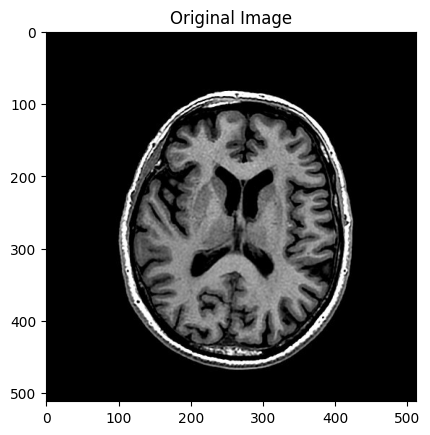

In [63]:
img = cv2.imread("brain.jpg",  cv2.IMREAD_GRAYSCALE)
show_img(img, 'Original Image')

In [64]:
img.shape

(512, 512)

Thresholding - segmentation technique that generates a binary image. separates into two regions based on a threshold values.

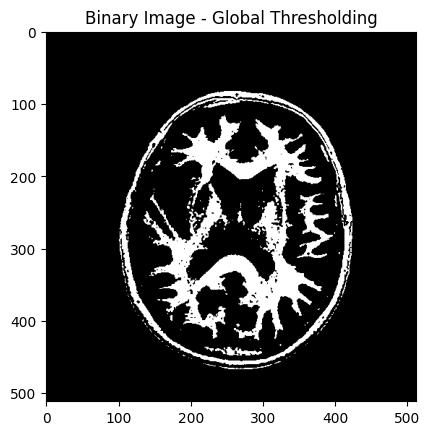

In [70]:
_, binary_image = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
show_img(binary_image, 'Binary Image - Global Thresholding')

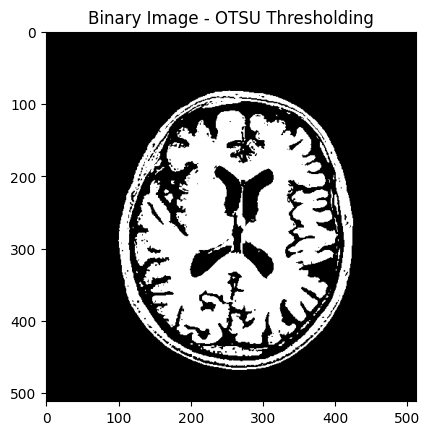

In [71]:
_, otsu_binary_img = cv2.threshold(img, 0, 255, 
                cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show_img(otsu_binary_img, 'Binary Image - OTSU Thresholding')

Global Thresholding Value: 67.0


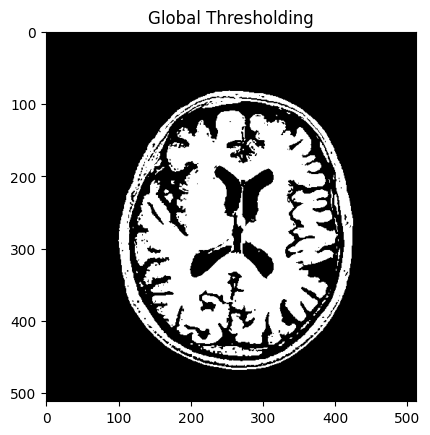

In [72]:
_, global_thresh_img = cv2.threshold(img, 0, 255,
                        cv2.THRESH_BINARY + cv2.THRESH_OTSU)
otsu_threshold_val = cv2.threshold(img, 0, 255,
                        cv2.THRESH_BINARY + cv2.THRESH_OTSU)[0]
print('Global Thresholding Value:', otsu_threshold_val)
show_img(global_thresh_img, 'Global Thresholding')

### WaterShed Algorithm
1. Marker Placement : place markers on local minima.
2. Flooding : floods the image with different colors
3. Catchment basin formation 
4. Boundary Identification

Morphological Gradient Processing - used to emphasize the edges and boundaries of objects in an image. Obtained by subtracting erosion from dilation of the image.\
Erosion - shrinks the regions in an image.\
Dilation - expands the regions in an image.

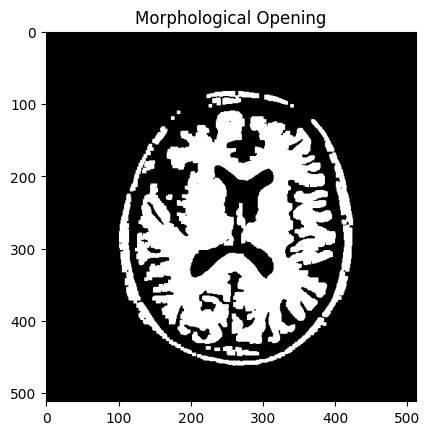

In [75]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
bin_img = cv2.morphologyEx(otsu_binary_img,
                        cv2.MORPH_OPEN,
                        kernel, iterations = 2)
show_img(bin_img, 'Morphological Opening')

**Detect black background and foreground of image**\
1. Dilate the image - this expands the bright region of the image
2. distanceTransform - calculates the distance if each white pixel in the binary image closest to the black pixel
3. Foreground area - apply thresholding on dist variable
4. Unknown area calculated as difference between background and foreground areas

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


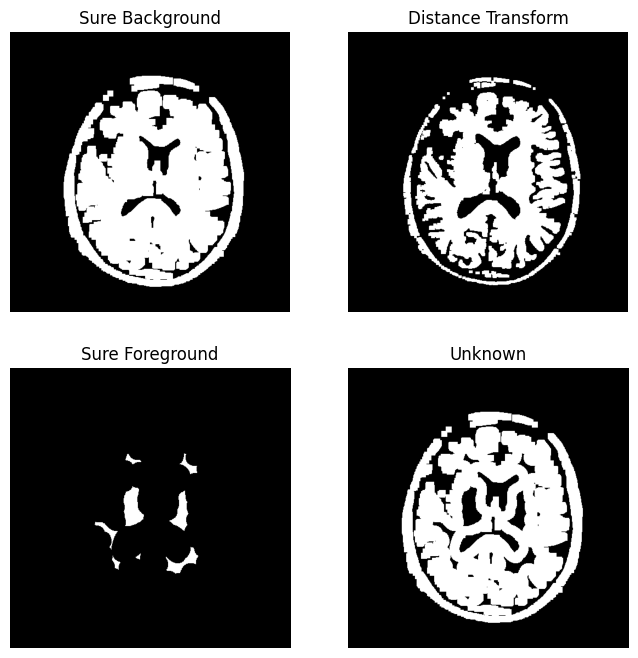

In [79]:
fig, axes = plt.subplots(2,2, figsize=(8,8))

sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
show_img(sure_bg, 'Sure Background', axes[0,0])

dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
show_img(dist, 'Distance Transform', axes[0,1])

_, sure_fg = cv2.threshold(dist, 0.5*dist.max(), 255, 0)
sure_fg = sure_fg.astype(np.uint8)
show_img(sure_fg, 'Sure Foreground', axes[1,0])

unknown = cv2.subtract(sure_bg, sure_fg)
show_img(unknown, 'Unknown', axes[1,1])

plt.show()

**Creating Marker Images**

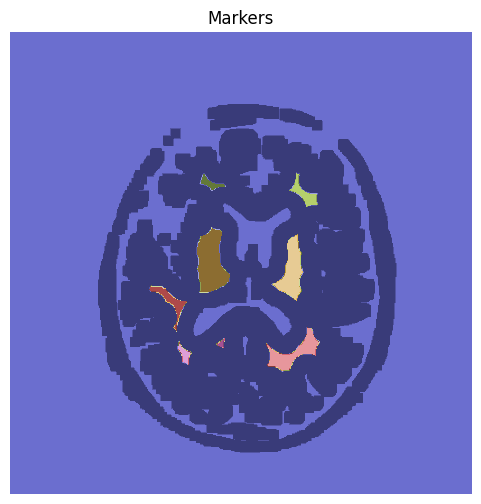

In [82]:
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1
markers[unknown==255] = 0

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(markers, cmap='tab20b')
ax.set_title('Markers')
ax.axis('off');

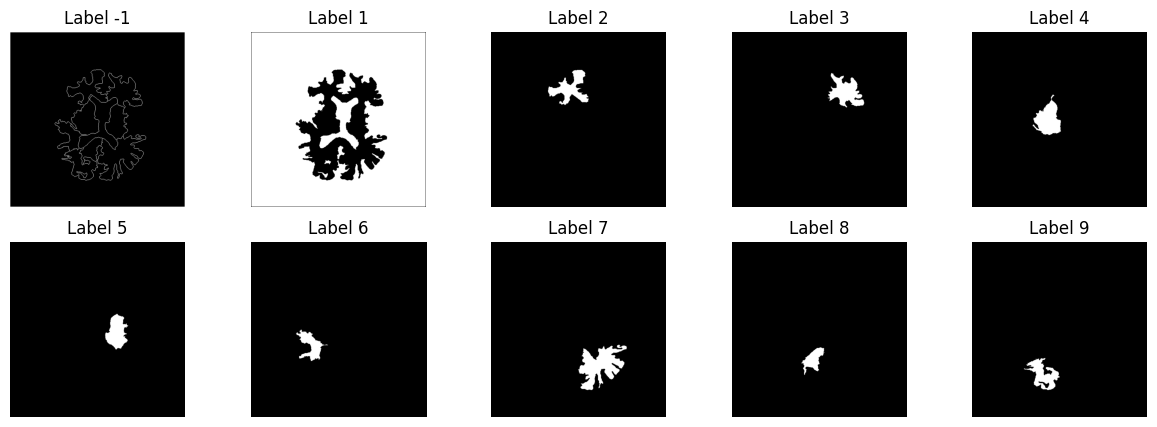

In [96]:
labels = np.unique(markers)

rows = 2
cols = (len(labels) + 1) // 2  # This ensures that cols is rounded up

fig, axes = plt.subplots(rows, cols, figsize=(15,5))
for i, label in enumerate(labels):
    mask = np.zeros_like(markers, dtype=np.uint8)
    mask[markers==label] = 255
    
    row = i // cols
    col = i % cols
    show_img(mask, f'Label {label}', axes[row, col])


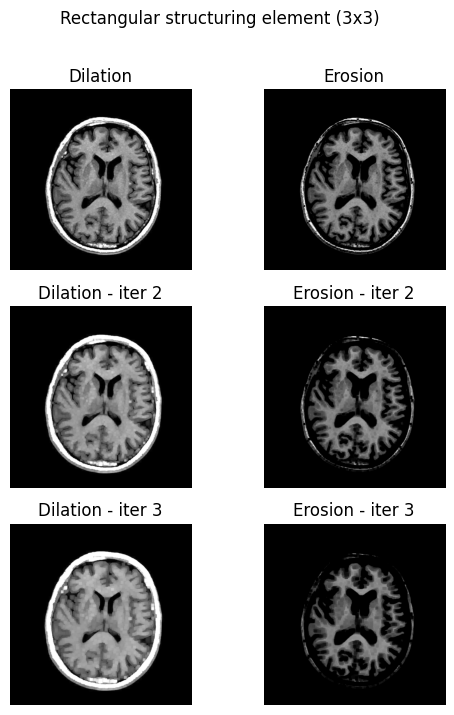

In [112]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

dilation  = cv2.dilate(img, kernel, iterations=1)
erosion = cv2.erode(img, kernel, iterations=1)

dilation2  = cv2.dilate(img, kernel, iterations=2)
erosion2 = cv2.erode(img, kernel, iterations=2)

dilation3  = cv2.dilate(img, kernel, iterations=3)
erosion3 = cv2.erode(img, kernel, iterations=3)

fig, axes = plt.subplots(3,2, figsize=(6,8))
fig.suptitle('Rectangular structuring element (3x3)')
show_img(dilation, 'Dilation', axes[0,0])
show_img(erosion, 'Erosion', axes[0,1])
show_img(dilation2, 'Dilation - iter 2', axes[1,0])
show_img(erosion2, 'Erosion - iter 2', axes[1,1])
show_img(dilation3, 'Dilation - iter 3', axes[2,0])
show_img(erosion3, 'Erosion - iter 3', axes[2,1])


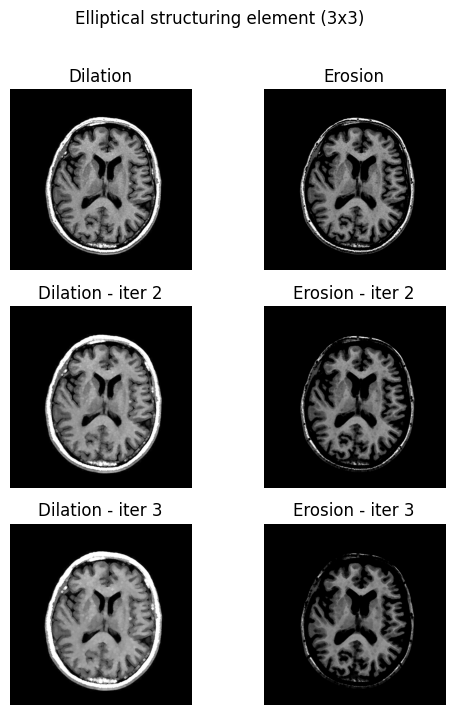

In [113]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

dilation  = cv2.dilate(img, kernel, iterations=1)
erosion = cv2.erode(img, kernel, iterations=1)

dilation2  = cv2.dilate(img, kernel, iterations=2)
erosion2 = cv2.erode(img, kernel, iterations=2)

dilation3  = cv2.dilate(img, kernel, iterations=3)
erosion3 = cv2.erode(img, kernel, iterations=3)

fig, axes = plt.subplots(3,2, figsize=(6,8))
fig.suptitle('Elliptical structuring element (3x3)')
show_img(dilation, 'Dilation', axes[0,0])
show_img(erosion, 'Erosion', axes[0,1])
show_img(dilation2, 'Dilation - iter 2', axes[1,0])
show_img(erosion2, 'Erosion - iter 2', axes[1,1])
show_img(dilation3, 'Dilation - iter 3', axes[2,0])
show_img(erosion3, 'Erosion - iter 3', axes[2,1])


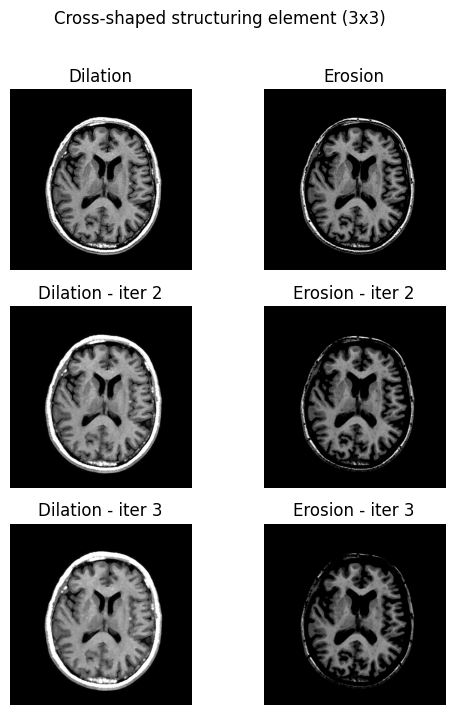

In [114]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

dilation  = cv2.dilate(img, kernel, iterations=1)
erosion = cv2.erode(img, kernel, iterations=1)

dilation2  = cv2.dilate(img, kernel, iterations=2)
erosion2 = cv2.erode(img, kernel, iterations=2)

dilation3  = cv2.dilate(img, kernel, iterations=3)
erosion3 = cv2.erode(img, kernel, iterations=3)

fig, axes = plt.subplots(3,2, figsize=(6,8))
fig.suptitle('Cross-shaped structuring element (3x3)')
show_img(dilation, 'Dilation', axes[0,0])
show_img(erosion, 'Erosion', axes[0,1])
show_img(dilation2, 'Dilation - iter 2', axes[1,0])
show_img(erosion2, 'Erosion - iter 2', axes[1,1])
show_img(dilation3, 'Dilation - iter 3', axes[2,0])
show_img(erosion3, 'Erosion - iter 3', axes[2,1])